https://github.com/jupyter/notebook/issues/2287

incase you run into an issue with running the code due to exceeding run rate (?)

In [42]:
# imports for database connection
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, func

# import these to view table column headers & rows
from sqlalchemy.orm import sessionmaker
from sqlalchemy import select

# Import the dependencies for analysis
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
# UPDATE PATH ONCE FINAL ANALYSIS FILE IS COMPILED
engine = create_engine("sqlite:///../../Resources/covid_db.db")

In [3]:
# reflect an existing database into a new model (creates base class for automap schema)
Base = automap_base()

In [4]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
Base.classes.keys()

['covid_stats', 'government_regulation']

In [6]:
# save references to each table
covid_stats = Base.classes.covid_stats
government_regulation = Base.classes.government_regulation

In [7]:
# Create session (link) from Python to the database
session = sessionmaker(bind=engine)()

In [8]:
# Merge covid_stats_table with government regulation_table
joined = session.query(covid_stats.primary_key_reaction,\
                        covid_stats.date_updated,\
                        covid_stats.iso_code,\
                        covid_stats.continent,\
                        covid_stats.location,\
                        covid_stats.population,\
                        covid_stats.population_density,\
                        covid_stats.median_age,\
                        covid_stats.new_cases,\
                        covid_stats.percentage_of_Pop_New_Cases,\
                        covid_stats.new_deaths,\
                        covid_stats.percentage_of_Pop_New_Deaths,\
                        covid_stats.new_tests,\
                        covid_stats.percentage_of_Pop_New_Tests,\
                        covid_stats.total_cases_updated,\
                        covid_stats.percentage_of_Pop_Total_Cases,\
                        covid_stats.total_deaths_updated,\
                        covid_stats.percentage_of_Pop_Total_Deaths,\
                        covid_stats.total_tests_updated,\
                        covid_stats.percentage_of_Pop_Total_Tests,\
                       government_regulation.primary_key_response,\
                       government_regulation.StringencyIndex_updated,\
                       government_regulation.percentage_change_stringency,\
                       government_regulation.StringencyLegacyIndex_updated,\
                       government_regulation.GovernmentResponseIndex_updated,\
                       government_regulation.percentage_change_GovernmentResponse,\
                       government_regulation.ContainmentHealthIndex_updated,\
                       government_regulation.percentage_change_ContainmentHealth,\
                       government_regulation.EconomicSupportIndex_updated,\
                       government_regulation.percentage_change_EconomicSupport)\
        .join(government_regulation,government_regulation.primary_key_response == covid_stats.primary_key_reaction)

# save the query results as a Pandas DataFrame and set the index
merged_covid_df = pd.DataFrame(joined, columns=['primary_key_reaction',
                                             'date_updated',
                                             'iso_code',
                                             'continent',
                                             'location',
                                             'population',
                                             'population_density',
                                             'median_age',
                                             'new_cases',
                                             'percentage_of_Pop_New_Cases',
                                             'new_deaths',
                                             'percentage_of_Pop_New_Deaths',
                                             'new_tests',
                                             'percentage_of_Pop_New_Tests',
                                             'total_cases_updated',
                                             'percentage_of_Pop_Total_Cases',
                                             'total_deaths_updated',
                                             'percentage_of_Pop_Total_Deaths',
                                             'total_tests_updated',
                                             'percentage_of_Pop_Total_Tests',
                                             'primary_key_response',
                                             'StringencyIndex_updated',
                                             'percentage_change_stringency',
                                             'StringencyLegacyIndex_updated',
                                             'GovernmentResponseIndex_updated',
                                             'percentage_change_GovernmentResponse',
                                             'ContainmentHealthIndex_updated',
                                             'percentage_change_ContainmentHealth',
                                             'EconomicSupportIndex_updated',
                                             'percentage_change_EconomicSupport'
                                             ])

In [9]:
# preview 
merged_covid_df

,primary_key_reaction,date_updated,iso_code,continent,location,population,population_density,median_age,new_cases,percentage_of_Pop_New_Cases,...,primary_key_response,StringencyIndex_updated,percentage_change_stringency,StringencyLegacyIndex_updated,GovernmentResponseIndex_updated,percentage_change_GovernmentResponse,ContainmentHealthIndex_updated,percentage_change_ContainmentHealth,EconomicSupportIndex_updated,percentage_change_EconomicSupport
0,ABW2020-03-13,2020-03-13,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-13,0.00,0.000000,0.00,2.56,0.000000,3.03,0.000000,0.0,0.0
1,ABW2020-03-19,2020-03-19,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-19,33.33,0.000000,42.86,29.49,15.015601,34.85,15.016502,0.0,0.0
2,ABW2020-03-20,2020-03-20,ABW,North America,Aruba,106766,584.800,41.2,2,0.001873,...,ABW2020-03-20,33.33,0.000000,42.86,29.49,0.000000,34.85,0.000000,0.0,0.0
3,ABW2020-03-21,2020-03-21,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-21,44.44,33.333333,60.71,37.18,26.076636,43.94,26.083214,0.0,0.0
4,ABW2020-03-22,2020-03-22,ABW,North America,Aruba,106766,584.800,41.2,0,0.000000,...,ABW2020-03-22,44.44,0.000000,60.71,37.18,0.000000,43.94,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32272,ZWE2020-08-27,2020-08-27,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,55,0.000370,...,ZWE2020-08-27,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32273,ZWE2020-08-28,2020-08-28,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,41,0.000276,...,ZWE2020-08-28,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32274,ZWE2020-08-29,2020-08-29,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,96,0.000646,...,ZWE2020-08-29,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0
32275,ZWE2020-08-30,2020-08-30,ZWE,Africa,Zimbabwe,14862927,42.729,19.6,18,0.000121,...,ZWE2020-08-30,80.56,0.000000,88.10,66.03,0.000000,73.48,0.000000,25.0,0.0


# Exploratory Analysis

In [10]:
# Create new Dataframe filtered for Canada
canada_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="Canada"].reset_index())
canada_df = canada_df.drop(["index"],axis=1)
# canada_df

In [11]:
# Create new Dataframe filtered for USA
usa_df = pd.DataFrame(merged_covid_df.loc[merged_covid_df["location"]=="United States"].reset_index())
usa_df = usa_df.drop(["index"],axis=1)
# usa_df

In [12]:
# Set up all x and y axis for Canada
x_axis = canada_df["date_updated"]


y_axis1 = canada_df["total_cases_updated"]
y_axis2 = canada_df["total_tests_updated"]
y_axis3 = canada_df["total_deaths_updated"]

y_axis4 = canada_df["new_cases"]
y_axis5 = canada_df["new_tests"]
y_axis6 = canada_df["new_deaths"]

y_axis7 = canada_df["StringencyIndex_updated"]
y_axis8 = canada_df["percentage_change_stringency"]

y_axis9 = canada_df["percentage_of_Pop_New_Tests"]
y_axis10 = canada_df["percentage_of_Pop_New_Cases"]
y_axis11 = canada_df["percentage_of_Pop_New_Deaths"]

y_axis12 = canada_df["percentage_of_Pop_Total_Tests"]
y_axis13 = canada_df["percentage_of_Pop_Total_Cases"]
y_axis14 = canada_df["percentage_of_Pop_Total_Deaths"]

In [13]:
# Set up all x and y axis for USA
x_axis0 = usa_df["date_updated"]

y_axis01 = usa_df["total_cases_updated"]
y_axis02 = usa_df["total_tests_updated"]
y_axis03 = usa_df["total_deaths_updated"]

y_axis04 = usa_df["new_cases"]
y_axis05 = usa_df["new_tests"]
y_axis06 = usa_df["new_deaths"]

y_axis07 = usa_df["StringencyIndex_updated"]
y_axis08 = usa_df["percentage_change_stringency"]

y_axis09 = usa_df["percentage_of_Pop_New_Tests"]
y_axis010 = usa_df["percentage_of_Pop_New_Cases"]
y_axis011 = usa_df["percentage_of_Pop_New_Deaths"]

y_axis012 = usa_df["percentage_of_Pop_Total_Tests"]
y_axis013 = usa_df["percentage_of_Pop_Total_Cases"]
y_axis014 = usa_df["percentage_of_Pop_Total_Deaths"]

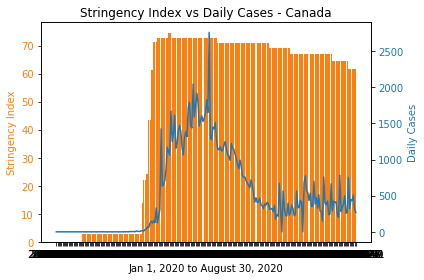

In [14]:
# Create comparison plot - index vs daily cases - CANADA
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Jan 1, 2020 to August 30, 2020')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis7, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis4, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Stringency Index vs Daily Cases - Canada")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

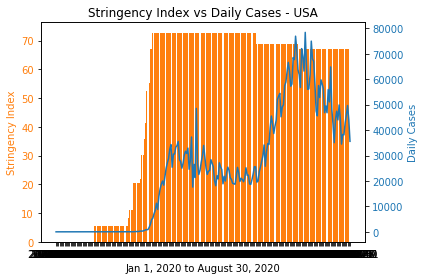

In [15]:
# Create comparison plot - index vs daily cases - USA
fig, ax1 = plt.subplots()

color = 'tab:orange'
ax1.set_xlabel('Jan 1, 2020 to August 30, 2020')
ax1.set_ylabel('Stringency Index', color=color)
ax1.bar(x_axis, y_axis07, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Daily Cases', color=color)  # we already handled the x-label with ax1
ax2.plot(x_axis, y_axis04, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Stringency Index vs Daily Cases - USA")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

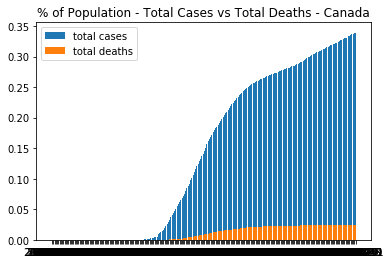

In [16]:
# Create the stacked bar chart - Canada
p1 = plt.bar(x_axis, y_axis13)
p2 = plt.bar(x_axis, y_axis14)

plt.title("% of Population - Total Cases vs Total Deaths - Canada")

plt.legend(["total cases", "total deaths"])

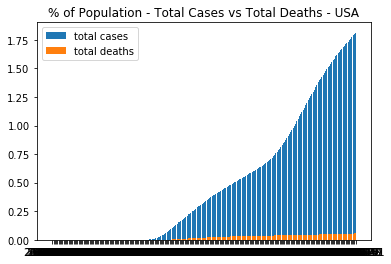

In [17]:
# Create the stacked bar chart - USA
p01 = plt.bar(x_axis0, y_axis013)
p02 = plt.bar(x_axis0, y_axis014)

plt.title("% of Population - Total Cases vs Total Deaths - USA")

plt.legend(["total cases", "total deaths"])

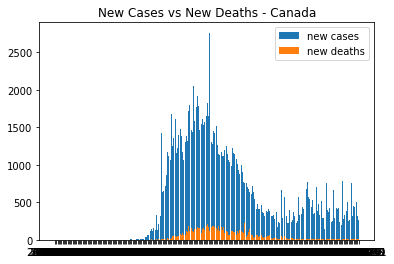

In [18]:
# Plot daily amounts for cases, deaths - Canada
p4 = plt.bar(x_axis, y_axis4)
p5 = plt.bar(x_axis, y_axis6)

plt.title("New Cases vs New Deaths - Canada")

plt.legend(["new cases", "new deaths"])

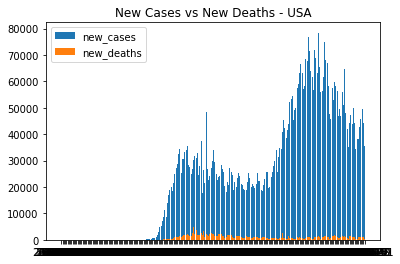

In [19]:
# Plot daily amounts for cases, deaths - Usa
p04 = plt.bar(x_axis, y_axis04)
p05 = plt.bar(x_axis, y_axis06)

plt.title("New Cases vs New Deaths - USA")

plt.legend(["new_cases", "new_deaths"])

Text(0.5, 1.0, 'Stringency Index Percentage Change - Canada')

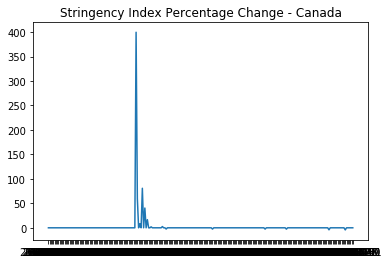

In [20]:
# Plot daily percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis8)

plt.title("Stringency Index Percentage Change - Canada")

Text(0.5, 1.0, 'Stringency Index Percentage Change - USA')

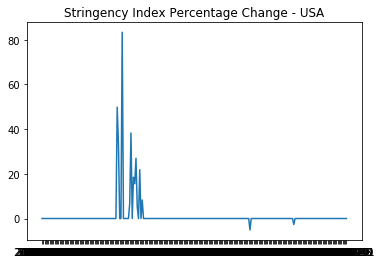

In [21]:
# Plot daily percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis08)

plt.title("Stringency Index Percentage Change - USA")

In [22]:
# Filter based on percentage changes greater than 10% or any decrease in policy - USA
new_canada_GT10 = canada_df.loc[(canada_df.percentage_change_stringency > 10) | (canada_df.percentage_change_stringency < 0)]

In [23]:
# Set the x-axis to a date_updated and y-axis to percentage change for Canada
x_axis = new_canada_GT10["date_updated"]
y_axis = new_canada_GT10["percentage_change_stringency"]

Text(0.5, 1.0, 'Material (+10% or <0%) Stringency Index Percentage Change - Canada')

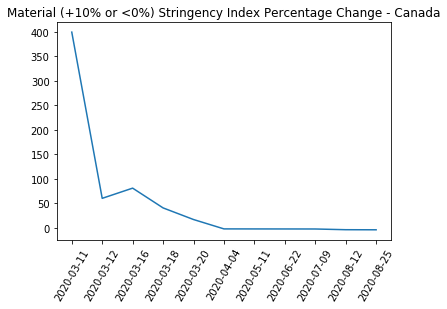

In [24]:
# Plot material percentage change for stringency index - CANADA
plt.plot(x_axis , y_axis)

plt.xticks(rotation=60)

plt.title("Material (+10% or <0%) Stringency Index Percentage Change - Canada")

In [25]:
# Filter based on percentage changes greater than 10% or any decrease in policy - USA
new_usa_GT10 = usa_df.loc[(usa_df.percentage_change_stringency > 10) | (usa_df.percentage_change_stringency < 0)]

In [26]:
# Set the x-axis to a date_updated and y-axis to percentage change for USA
x_axis0 = new_usa_GT10["date_updated"]
y_axis0 = new_usa_GT10["percentage_change_stringency"]

Text(0.5, 1.0, 'Material (+10% or <0%) Stringency Index Percentage Change - USA')

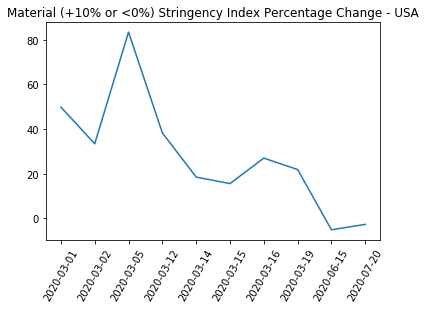

In [27]:
# Plot material percentage change for stringency index - USA
plt.plot(x_axis0 , y_axis0)

plt.xticks(rotation=60)

plt.title("Material (+10% or <0%) Stringency Index Percentage Change - USA")

### Trying to capture total stats based on material changes in stringency index

In [28]:
# To track # days out - CANADA
canada_df["date_updated"] = pd.to_datetime(canada_df['date_updated'])
canada_df['30_days'] = canada_df['date_updated']+timedelta(days=30)
canada_df['60_days'] = canada_df['date_updated']+timedelta(days=60)

In [29]:
# Create date shifted DataFrames - CANADA
sub_total_updated = canada_df[["date_updated","location","total_tests_updated","total_cases_updated","total_deaths_updated"]]

sub_total_updated_30 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-30" ].reset_index()
sub_total_updated_30 = sub_total_updated_30.drop(["index"], axis=1)

sub_total_updated_60 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-02-29" ].reset_index()
sub_total_updated_60 = sub_total_updated_60.drop(["index"], axis=1)

In [30]:
# Add new columns for shifted results - CANADA
# 30 Days out...
canada_df["30_Days_Total_Tests"] = sub_total_updated_30["total_tests_updated"]
canada_df["30_Days_Total_Cases"] = sub_total_updated_30["total_cases_updated"]
canada_df["30_Days_Total_Deaths"] = sub_total_updated_30["total_deaths_updated"]

# 60 Days out...
canada_df["60_Days_Total_Tests"] = sub_total_updated_60["total_tests_updated"]
canada_df["60_Days_Total_Cases"] = sub_total_updated_60["total_cases_updated"]
canada_df["60_Days_Total_Deaths"] = sub_total_updated_60["total_deaths_updated"]

In [31]:
# In all shifter results columns, replace NaN with proceeding value - CANADA
canada_df_filled = canada_df.fillna(method="ffill")

In [32]:
# Add new columns for % change from shifter results - CANADA
# 30 Days out...
canada_df_filled["30_Days_Percentage_Change_Tests"] = ((canada_df_filled["30_Days_Total_Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["30_Days_Percentage_Change_Cases"] = ((canada_df_filled["30_Days_Total_Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["30_Days_Percentage_Change_Deaths"] = ((canada_df_filled["30_Days_Total_Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

# 60 Days out...
canada_df_filled["60_Days_Percentage_Change_Tests"] = ((canada_df_filled["60_Days_Total_Tests"]-canada_df_filled["total_tests_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["60_Days_Percentage_Change_Cases"] = ((canada_df_filled["60_Days_Total_Cases"]-canada_df_filled["total_cases_updated"])/canada_df_filled["total_tests_updated"])*100
canada_df_filled["60_Days_Percentage_Change_Deaths"] = ((canada_df_filled["60_Days_Total_Deaths"]-canada_df_filled["total_deaths_updated"])/canada_df_filled["total_tests_updated"])*100

In [33]:
# Filter for material percentage changes (>10% or <0%) - CANADA
new_canada_projection = canada_df_filled.loc[(canada_df.percentage_change_stringency > 10) | 
                                    (canada_df.percentage_change_stringency < 0)]

In [34]:
# Rearrange columns in logical order - CANADA
new_canada_projection = new_canada_projection[['date_updated', 
                                         'location', 
                                         'population',
                                         'StringencyIndex_updated',
                                         'new_tests', 
                                         'percentage_of_Pop_New_Tests',
                                         'total_tests_updated', 
                                         'percentage_of_Pop_Total_Tests',
                                         '30_Days_Total_Tests',
                                         '30_Days_Percentage_Change_Tests',
                                         '60_Days_Total_Tests', 
                                         '60_Days_Percentage_Change_Tests',
                                         'new_cases', 
                                         'percentage_of_Pop_New_Cases',
                                         'total_cases_updated', 
                                         'percentage_of_Pop_Total_Cases',
                                         '30_Days_Total_Cases',
                                         '30_Days_Percentage_Change_Cases',
                                         '60_Days_Total_Cases',
                                         '60_Days_Percentage_Change_Cases',
                                         'new_deaths',
                                         'percentage_of_Pop_New_Deaths',
                                         'total_deaths_updated',
                                         'percentage_of_Pop_Total_Deaths',
                                         '30_Days_Total_Deaths',
                                         '30_Days_Percentage_Change_Deaths',
                                         '60_Days_Total_Deaths', 
                                         '60_Days_Percentage_Change_Deaths'
                                        ]]

# Replace NaN with 0 
new_canada_projection.fillna(0, inplace=True)

# Replace inf with 0 
new_canada_projection.replace(np.inf, 0, inplace=True)

new_canada_projection

,date_updated,location,population,StringencyIndex_updated,new_tests,percentage_of_Pop_New_Tests,total_tests_updated,percentage_of_Pop_Total_Tests,30_Days_Total_Tests,30_Days_Percentage_Change_Tests,...,60_Days_Total_Cases,60_Days_Percentage_Change_Cases,new_deaths,percentage_of_Pop_New_Deaths,total_deaths_updated,percentage_of_Pop_Total_Deaths,30_Days_Total_Deaths,30_Days_Percentage_Change_Deaths,60_Days_Total_Deaths,60_Days_Percentage_Change_Deaths
70,2020-03-11,Canada,37742157,13.89,0,0.000000,0,0.000000,373581.0,0.000000,...,66434.0,0.000000,0,0.000000e+00,1,0.000003,435.0,0.000000,4569.0,0.000000
71,2020-03-12,Canada,37742157,22.22,0,0.000000,0,0.000000,383322.0,0.000000,...,67702.0,0.000000,0,0.000000e+00,1,0.000003,509.0,0.000000,4693.0,0.000000
75,2020-03-16,Canada,37742157,43.52,0,0.000000,0,0.000000,450717.0,0.000000,...,72278.0,0.000000,0,0.000000e+00,1,0.000003,780.0,0.000000,5304.0,0.000000
77,2020-03-18,Canada,37742157,61.11,0,0.000000,53975,0.143010,487060.0,802.380732,...,74602.0,137.161649,4,1.059823e-07,8,0.000021,1010.0,1.856415,5562.0,10.289949
79,2020-03-20,Canada,37742157,71.30,21858,0.057914,76814,0.203523,516216.0,572.033744,...,76991.0,99.129065,1,2.649557e-08,10,0.000026,1309.0,1.691098,5782.0,7.514255
94,2020-04-04,Canada,37742157,72.69,16906,0.044793,311971,0.826585,893490.0,186.401621,...,91694.0,25.378962,49,1.298283e-06,187,0.000495,3566.0,1.083113,7326.0,2.288354
131,2020-05-11,Canada,37742157,70.83,25722,0.068152,1118950,2.964722,1930065.0,72.488941,...,106422.0,3.357970,178,4.716212e-06,4871,0.012906,7835.0,0.264891,8737.0,0.345502
173,2020-06-22,Canada,37742157,68.98,32660,0.086535,2415365,6.399647,3573554.0,47.950889,...,123490.0,0.917625,20,5.299114e-07,8430,0.022336,8858.0,0.017720,9049.0,0.025628
190,2020-07-09,Canada,37742157,67.13,35169,0.093182,3055265,8.095099,4319172.0,41.368163,...,127940.0,0.704292,26,6.888848e-07,8737,0.023149,8966.0,0.007495,9117.0,0.012438
224,2020-08-12,Canada,37742157,64.35,36529,0.096786,4541747,12.033618,5440371.0,19.785867,...,127940.0,0.165883,4,1.059823e-07,8991,0.023822,9117.0,0.002774,9117.0,0.002774


In [35]:
# To track # days out - USA
usa_df["date_updated"] = pd.to_datetime(usa_df['date_updated'])

usa_df['30_days'] = usa_df['date_updated']+timedelta(days=30)
usa_df['60_days'] = usa_df['date_updated']+timedelta(days=60)

In [36]:
# Create date shifted DataFrames - USA
sub_total_updated = usa_df[["date_updated","location","total_tests_updated","total_cases_updated","total_deaths_updated"]]

sub_total_updated_30 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-01-30" ].reset_index()
sub_total_updated_30 = sub_total_updated_30.drop(["index"], axis=1)

sub_total_updated_60 = sub_total_updated.loc[sub_total_updated.date_updated >= "2020-02-29" ].reset_index()
sub_total_updated_60 = sub_total_updated_60.drop(["index"], axis=1)

In [37]:
# Add new columns for shifted results - USA
# 30 Days out...
usa_df["30_Days_Total_Tests"] = sub_total_updated_30["total_tests_updated"]
usa_df["30_Days_Total_Cases"] = sub_total_updated_30["total_cases_updated"]
usa_df["30_Days_Total_Deaths"] = sub_total_updated_30["total_deaths_updated"]

# 60 Days out...
usa_df["60_Days_Total_Tests"] = sub_total_updated_60["total_tests_updated"]
usa_df["60_Days_Total_Cases"] = sub_total_updated_60["total_cases_updated"]
usa_df["60_Days_Total_Deaths"] = sub_total_updated_60["total_deaths_updated"]

In [38]:
# In all shifter results columns, replace NaN with proceeding value - USA
usa_df_filled = usa_df.fillna(method="ffill")

In [39]:
# Add new columns for % change from shifter results - USA
# 30 Days out...
usa_df_filled["30_Days_Percentage_Change_Tests"] = ((usa_df_filled["30_Days_Total_Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["30_Days_Percentage_Change_Cases"] = ((usa_df_filled["30_Days_Total_Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["30_Days_Percentage_Change_Deaths"] = ((usa_df_filled["30_Days_Total_Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

# 60 Days out...
usa_df_filled["60_Days_Percentage_Change_Tests"] = ((usa_df_filled["60_Days_Total_Tests"]-usa_df_filled["total_tests_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["60_Days_Percentage_Change_Cases"] = ((usa_df_filled["60_Days_Total_Cases"]-usa_df_filled["total_cases_updated"])/usa_df_filled["total_tests_updated"])*100
usa_df_filled["60_Days_Percentage_Change_Deaths"] = ((usa_df_filled["60_Days_Total_Deaths"]-usa_df_filled["total_deaths_updated"])/usa_df_filled["total_tests_updated"])*100

In [40]:
# Filter for material percentage changes (>10% or <0%) - USA
new_usa_projection = usa_df_filled.loc[(usa_df.percentage_change_stringency > 10) | 
                                    (usa_df.percentage_change_stringency < 0)]

In [41]:
# Rearrange columns in logical order - USA
new_usa_projection = new_usa_projection[['date_updated', 
                                         'location', 
                                         'population',
                                         'StringencyIndex_updated',
                                         'new_tests', 
                                         'percentage_of_Pop_New_Tests',
                                         'total_tests_updated', 
                                         'percentage_of_Pop_Total_Tests',
                                         '30_Days_Total_Tests',
                                         '30_Days_Percentage_Change_Tests',
                                         '60_Days_Total_Tests', 
                                         '60_Days_Percentage_Change_Tests',
                                         'new_cases', 
                                         'percentage_of_Pop_New_Cases',
                                         'total_cases_updated', 
                                         'percentage_of_Pop_Total_Cases',
                                         '30_Days_Total_Cases',
                                         '30_Days_Percentage_Change_Cases',
                                         '60_Days_Total_Cases',
                                         '60_Days_Percentage_Change_Cases',
                                         'new_deaths',
                                         'percentage_of_Pop_New_Deaths',
                                         'total_deaths_updated',
                                         'percentage_of_Pop_Total_Deaths',
                                         '30_Days_Total_Deaths',
                                         '30_Days_Percentage_Change_Deaths',
                                         '60_Days_Total_Deaths', 
                                         '60_Days_Percentage_Change_Deaths'
                                        ]]

# Replace NaN with 0 
new_usa_projection.fillna(0, inplace=True)

# Replace inf with 0 
new_usa_projection.replace(np.inf, 0, inplace=True)

new_usa_projection

,date_updated,location,population,StringencyIndex_updated,new_tests,percentage_of_Pop_New_Tests,total_tests_updated,percentage_of_Pop_Total_Tests,30_Days_Total_Tests,30_Days_Percentage_Change_Tests,...,60_Days_Total_Cases,60_Days_Percentage_Change_Cases,new_deaths,percentage_of_Pop_New_Deaths,total_deaths_updated,percentage_of_Pop_Total_Deaths,30_Days_Total_Deaths,30_Days_Percentage_Change_Deaths,60_Days_Total_Deaths,60_Days_Percentage_Change_Deaths
60,2020-03-01,United States,331002647,8.33,132,0.000040,132,0.000040,1214667.0,920102.272727,...,1012583.0,767056.060606,1,3.021124e-09,1,3.021124e-07,2509.0,1900.000000,58355.0,44207.575758
61,2020-03-02,United States,331002647,11.11,345,0.000104,477,0.000144,1339744.0,280768.763103,...,1039909.0,217991.614256,1,3.021124e-09,2,6.042248e-07,3170.0,664.150943,60966.0,12780.712788
64,2020-03-05,United States,331002647,20.37,1119,0.000338,3217,0.000972,1760928.0,54638.203295,...,1133069.0,35216.350637,2,6.042248e-09,11,3.323236e-06,6053.0,187.814734,66385.0,2063.226609
71,2020-03-12,United States,331002647,30.09,6786,0.002050,22801,0.006888,2981872.0,12977.812377,...,1309541.0,5737.594842,2,6.042248e-09,30,9.063372e-06,16690.0,73.066971,78794.0,345.440989
73,2020-03-14,United States,331002647,35.65,10305,0.003113,42751,0.012916,3318408.0,7662.176323,...,1347916.0,3147.860869,7,2.114787e-08,47,1.419928e-05,20608.0,48.094781,80684.0,188.620149
74,2020-03-15,United States,331002647,41.20,11777,0.003558,54528,0.016474,3425649.0,6182.366857,...,1369964.0,2506.992738,10,3.021124e-08,57,1.722041e-05,22108.0,40.439774,82387.0,150.986649
75,2020-03-16,United States,331002647,52.31,22441,0.006780,76969,0.023253,3576080.0,4546.130260,...,1390746.0,1801.987813,12,3.625349e-08,69,2.084575e-05,23649.0,30.635710,84133.0,109.217997
78,2020-03-19,United States,331002647,67.13,55633,0.016807,213433,0.064481,4102686.0,1822.236018,...,1467884.0,683.338097,42,1.268872e-07,150,4.531686e-05,33284.0,15.524310,88754.0,41.513730
166,2020-06-15,United States,331002647,68.98,558795,0.168819,26309869,7.948537,47192877.0,79.373288,...,5197148.0,11.794354,296,8.942527e-07,115732,3.496407e-02,135605.0,0.075534,166027.0,0.191164
201,2020-07-20,United States,331002647,67.13,712174,0.215157,52189670,15.767146,76452601.0,46.489911,...,5997163.0,4.261194,415,1.253766e-06,140534,4.245706e-02,170497.0,0.057412,183069.0,0.081501
